<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Dataset - Dataset.csv')

In [ ]:
data.head(5)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [ ]:
data.isnull().sum()

over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
categorical_features = ["over_draft","credit_history", "purpose", "employment", "location", "Average_Credit_Balance","personal_status", "other_parties", "other_payment_plans", "housing", "job", "own_telephone", "foreign_worker"]
numerical_features = ["credit_usage", "current_balance", "Average_Credit_Balance", "cc_age"]


In [ ]:
target_variable = "class"
independent_variables = [ "credit_usage", "credit_history", "purpose", "current_balance", "Average_Credit_Balance", "employment", "location", "personal_status", "other_parties", "residence_since", "property_magnitude", "cc_age", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker"]


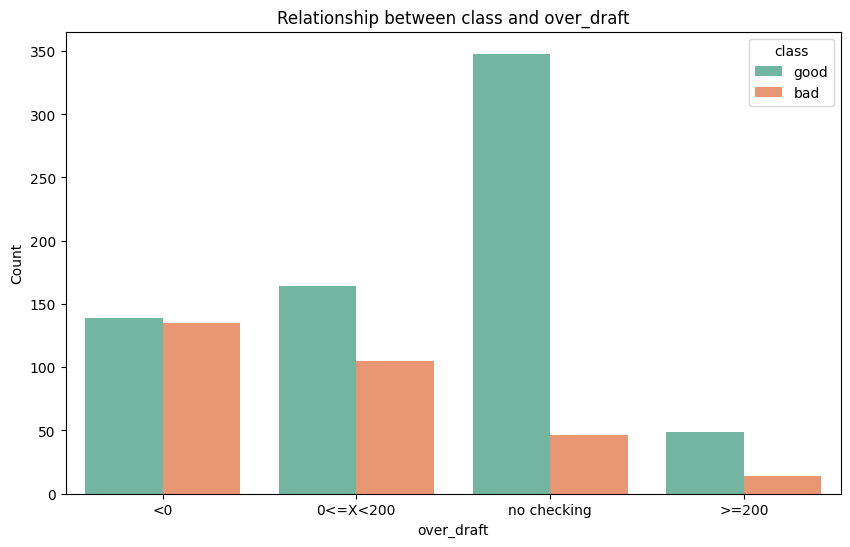

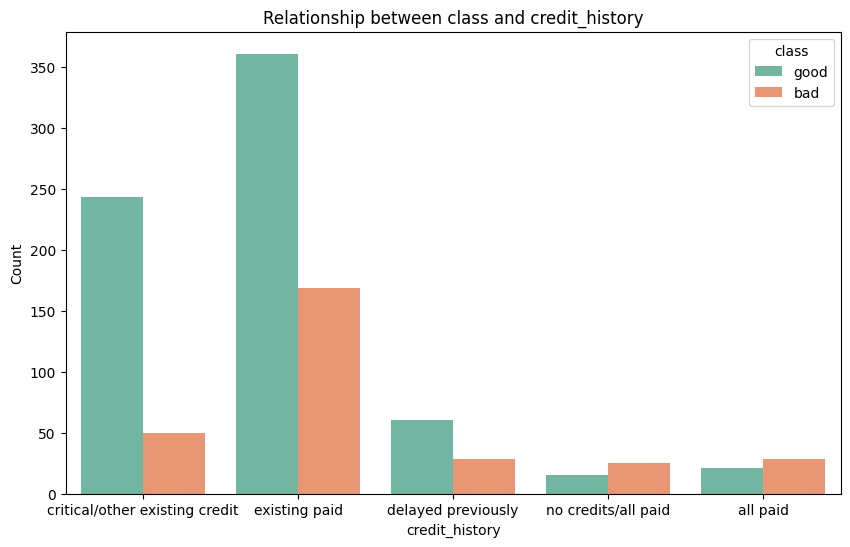

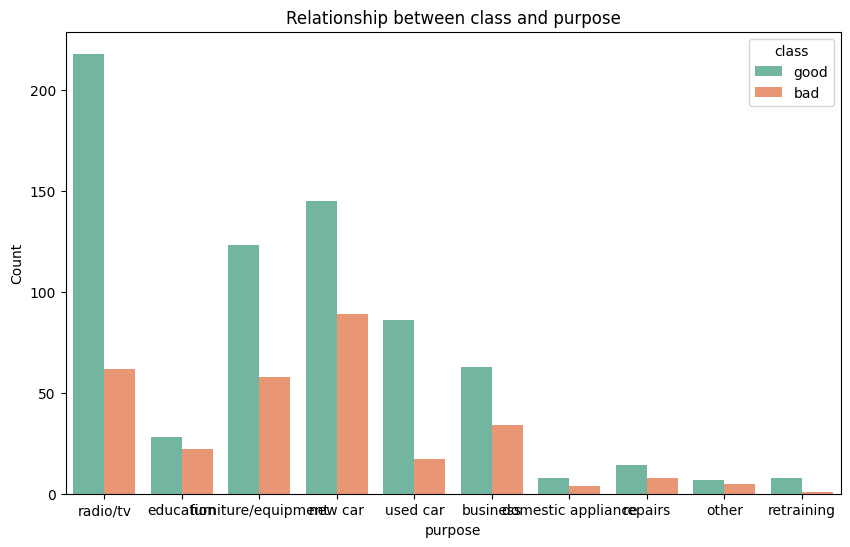

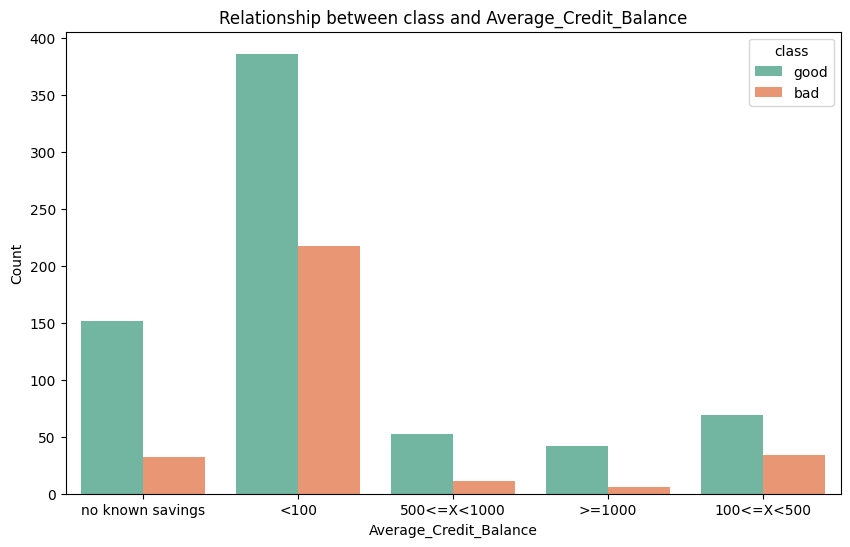

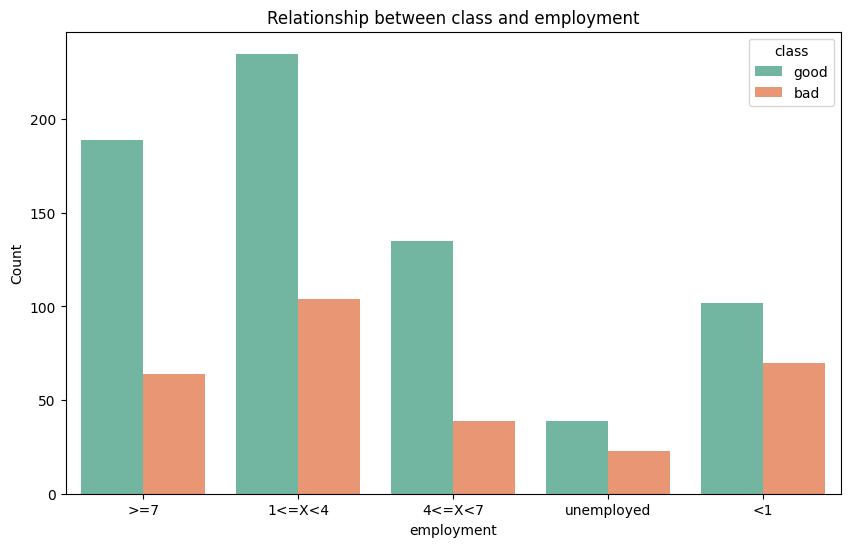

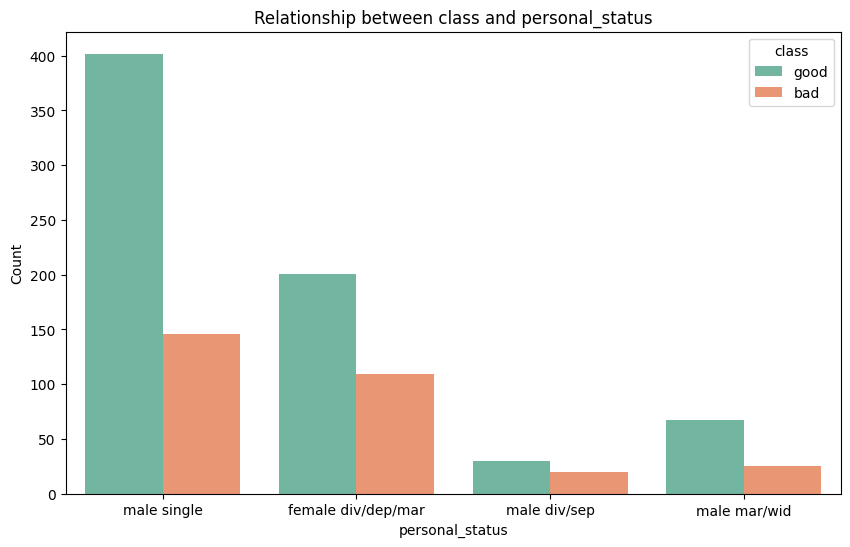

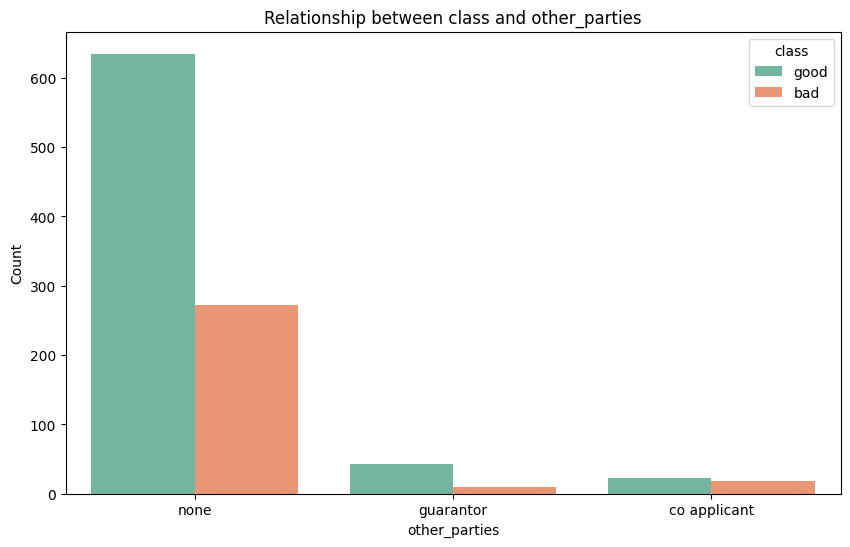

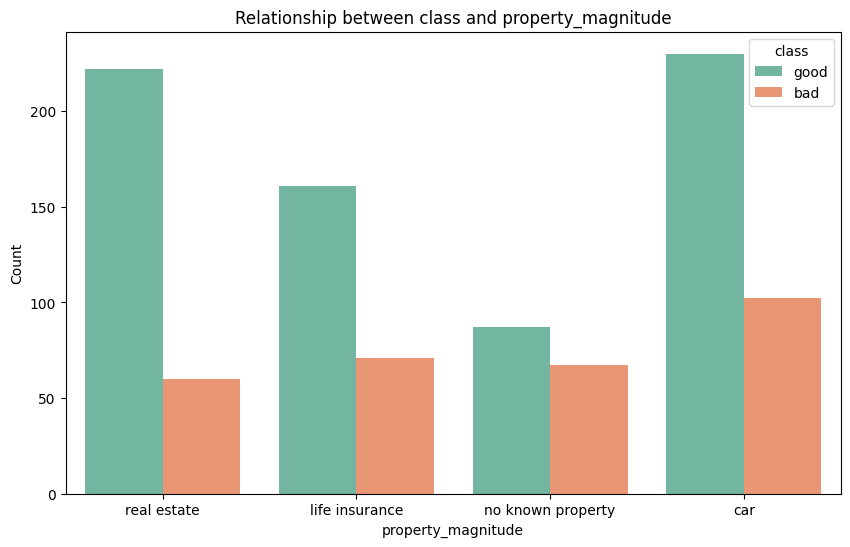

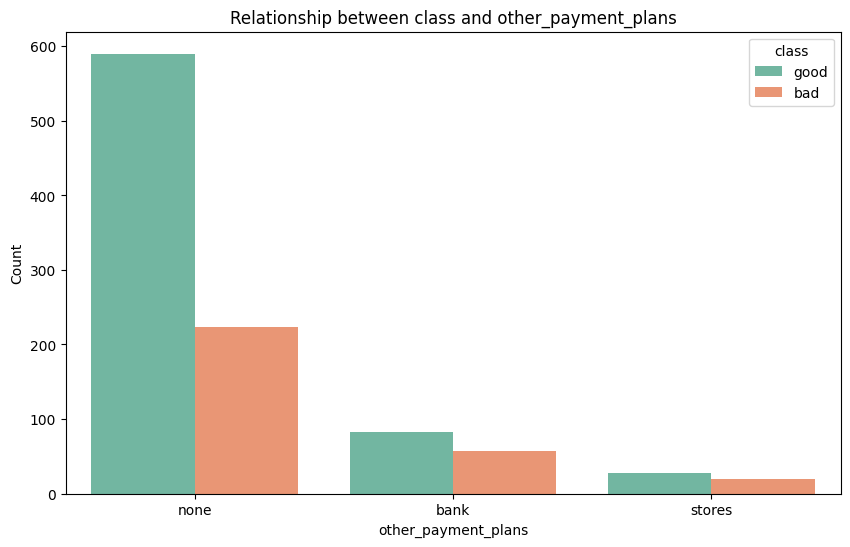

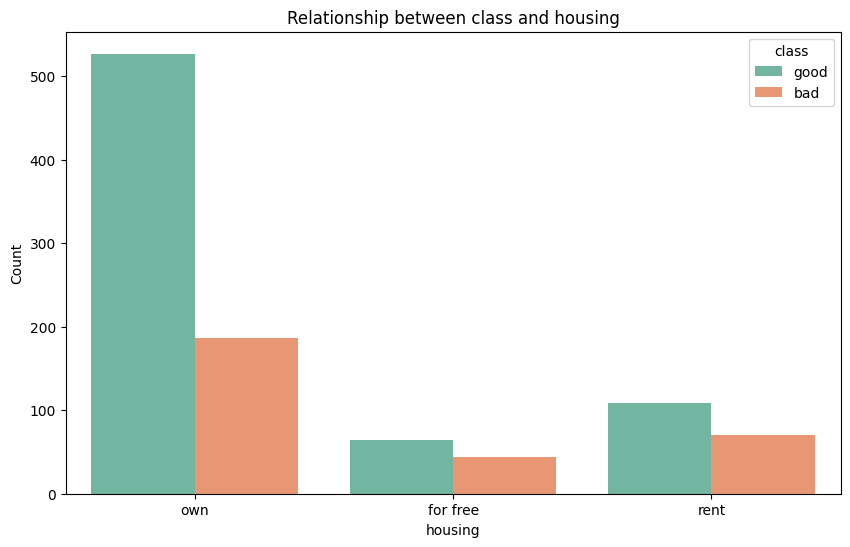

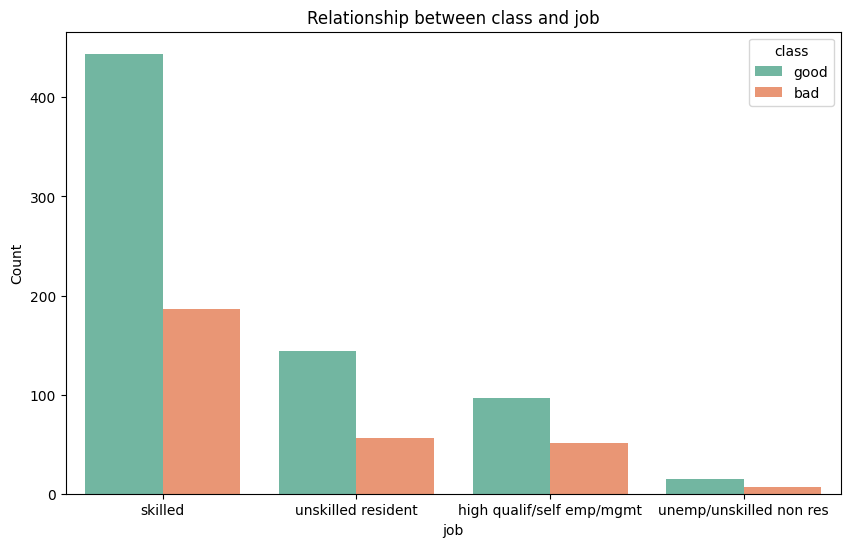

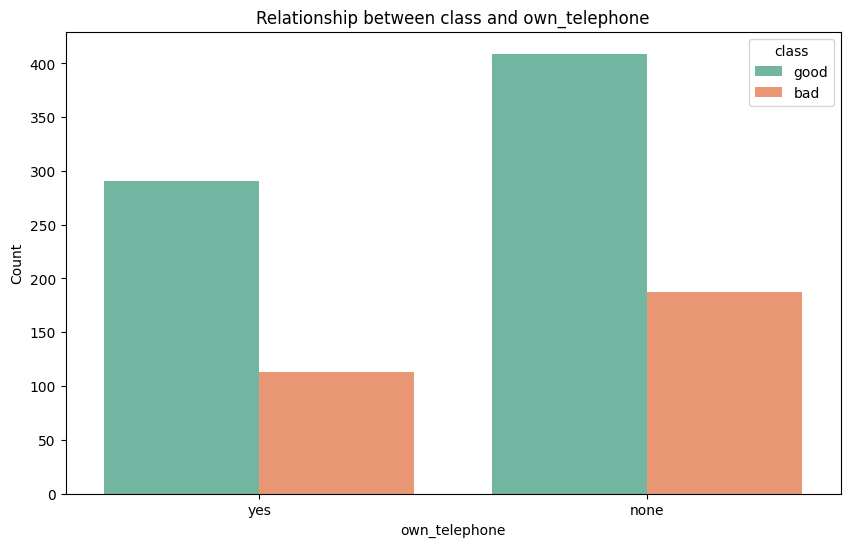

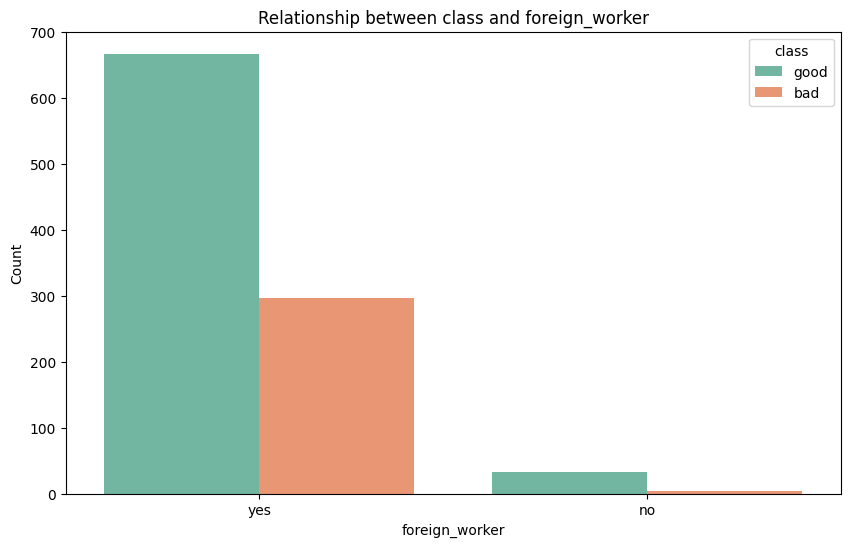

In [ ]:
for variable in independent_variables:
    if data[variable].dtype == "object":
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=variable, hue=target_variable, palette="Set2")
        plt.title(f"Relationship between {target_variable} and {variable}")
        plt.xlabel(variable)
        plt.ylabel("Count")
        plt.legend(title=target_variable)
        plt.show()

TO examine the relationships between categorical variables and the target variable, we use bar plots.
Each bar represents the count of each category within the independent variable, and the bars are stacked based on the different classes of the target variable.

In [ ]:
X = data.drop("class", axis=1)
y = data["class"]


In [ ]:
X = X.replace('<0', -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = ["credit_usage", "current_balance", "Average_Credit_Balance", "cc_age", "existing_credits", "num_dependents"]

In [ ]:
categorical_transformer = OneHotEncoder(drop="first")
categorical_transformer.fit(X_train[categorical_features])
X_train_encoded = categorical_transformer.transform(X_train[categorical_features])
X_test_encoded = categorical_transformer.transform(X_test[categorical_features])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Encode "overdraft"
X["overdraft_encoded"] = label_encoder.fit_transform(X["over_draft"])


In [ ]:
categorical_columns = X.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])



In [ ]:
data.dtypes

over_draft                int64
credit_usage              int64
credit_history            int64
purpose                   int64
current_balance           int64
Average_Credit_Balance    int64
employment                int64
location                  int64
personal_status           int64
other_parties             int64
residence_since           int64
property_magnitude        int64
cc_age                    int64
other_payment_plans       int64
housing                   int64
existing_credits          int64
job                       int64
num_dependents            int64
own_telephone             int64
foreign_worker            int64
class                     int64
dtype: object

In [ ]:
le = LabelEncoder()

# fit and transform the over_draft column
data['class'] = le.fit_transform(data['class'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1",f1)

accuracy 0.73
precision 0.7604790419161677
recall 0.900709219858156
f1 0.8246753246753247


In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.7272508714989782

In [ ]:
# loop over the columns of the data frame
for col in data.columns:
  # check if the column is an object type
  if data[col].dtype == 'object':
    # encode the column using the label encoder
    data[col] = le.fit_transform(data[col])


In [ ]:
from imblearn.over_sampling import SMOTE
X = data.drop('class', axis=1)
y = data['class']

# apply SMOTE to the dataset
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)


In [ ]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [ ]:
# import the LogisticRegression and DecisionTreeClassifier classes
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# create an instance of LogisticRegression
lr = LogisticRegression(solver='liblinear', C=0.1)

# fit the model to the training data
lr.fit(X_train, y_train)

# predict the class labels for the testing data
y_pred_lr = lr.predict(X_test)

# create an instance of DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)

# fit the model to the training data
dt.fit(X_train, y_train)

# predict the class labels for the testing data
y_pred_dt = dt.predict(X_test)

# import the metrics module
from sklearn import metrics

# calculate the accuracy score for logistic regression
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
print('Accuracy of logistic regression: ', acc_lr)

# calculate the accuracy score for decision tree
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
print('Accuracy of decision tree: ', acc_dt)


Accuracy of logistic regression:  0.7571428571428571
Accuracy of decision tree:  0.75
